In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


# Context
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGood Fitness retail store at any time in the past three months. The data is stored in the CardioGoodFitness.csv file.

# Objective
Perform descriptive analysis to create a customer profile for each CardioGood Fitness treadmill product line.

# Data Dictionary
The team identified the following customer variables to study:

|Attribute|Description|
|:---------|:------------|
|__Product__| Product purchased - TM195, TM498, or TM798|
|__Gender__| Male or Female|
|__Age__| Age of the customer in years|
|__Education__| Education of the customer in years|
|__MaritalStatus__| Single or partnered|
|__Income__| Annual household income|
|__Usage__| The average number of times the customer plans to use the treadmill each week|
|__Miles__| The average number of miles the customer expects to walk/run each week|
|__Fitness__| Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape|

# Questions to explore
* What are the different types of variables in the data?
* What is the distribution of different variables in the data?
* Which product is more popular among males or females?
* Is the product purchase affected by the marital status of the customer?
* Is there a significant correlation among some of the variables?
* What is the distribution of the average number of miles for each product?

In [2]:
# Inputs
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Type analysis
df = pd.read_csv('/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


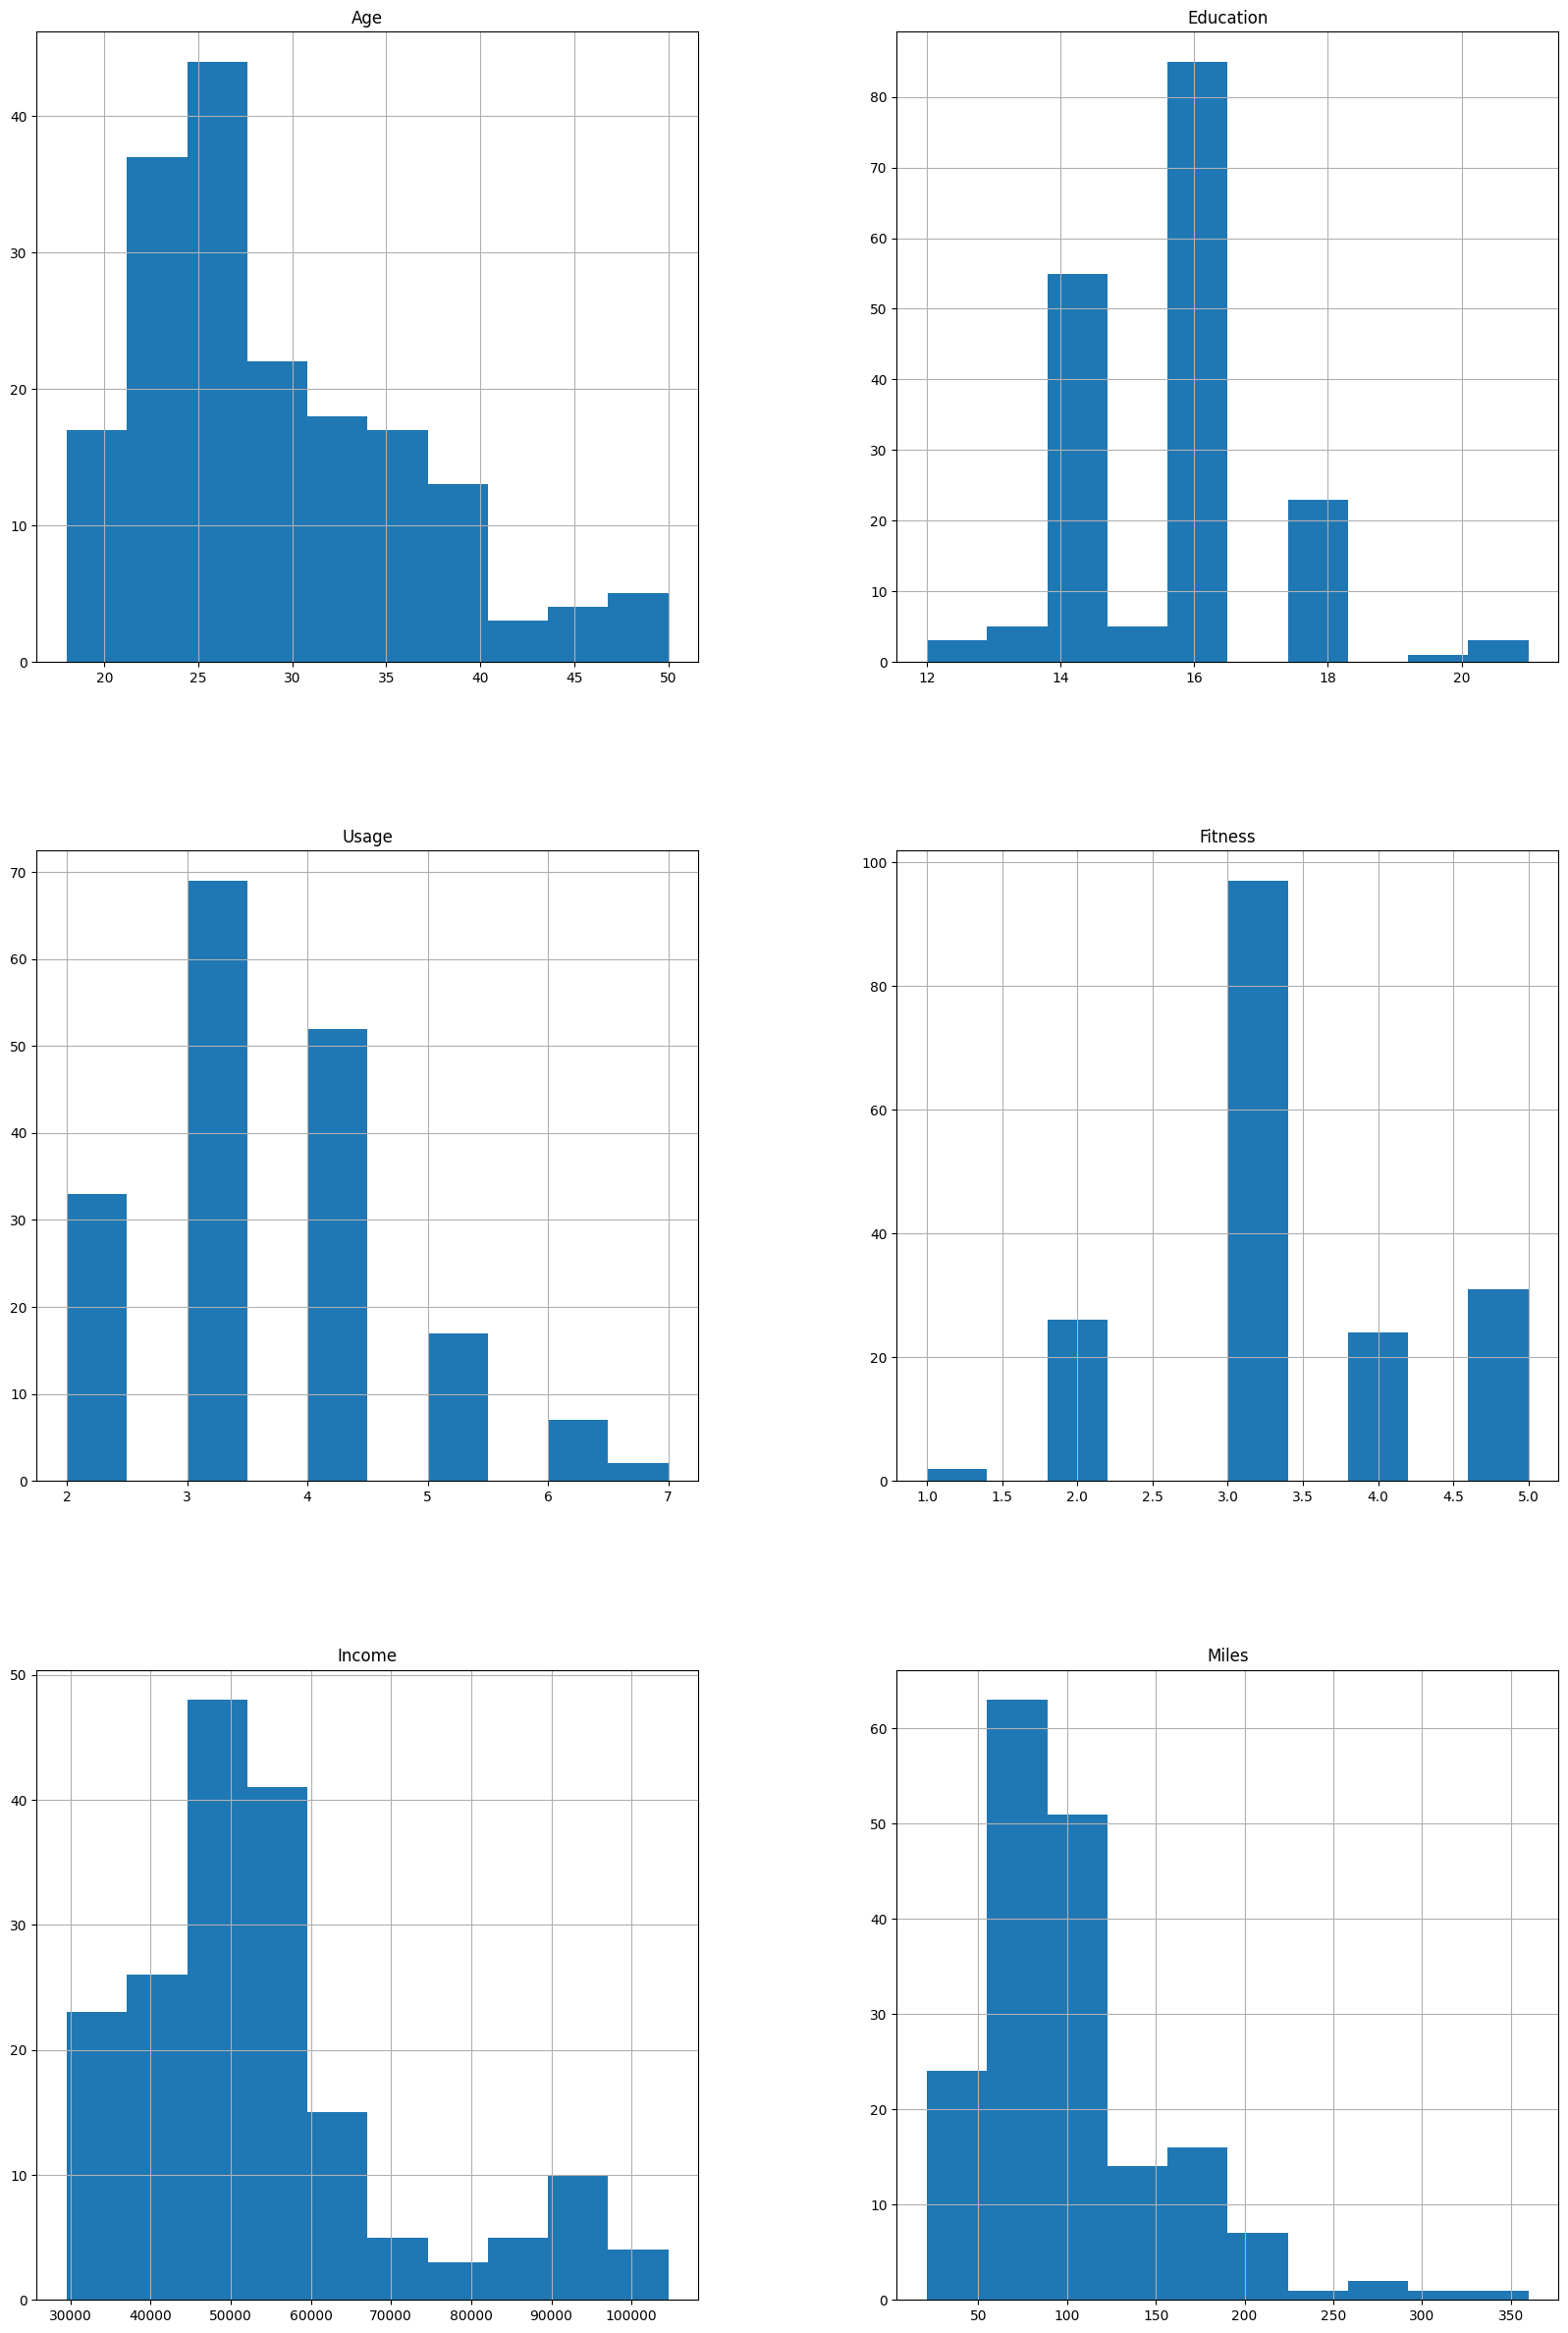

In [4]:
df.hist(figsize=(20,30));

* Income has a bimodal distribution

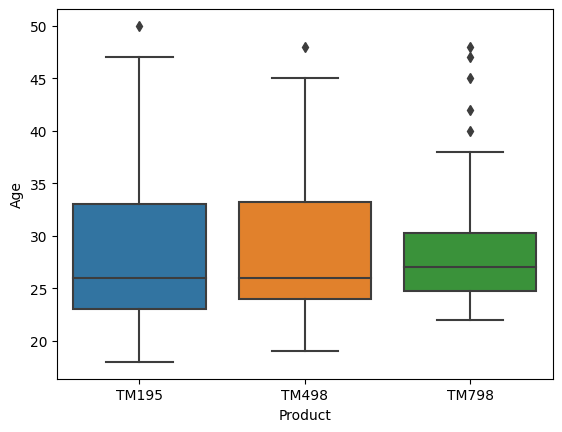

In [5]:
sns.boxplot(x='Product',y='Age',data=df);

In [6]:
pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [7]:
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


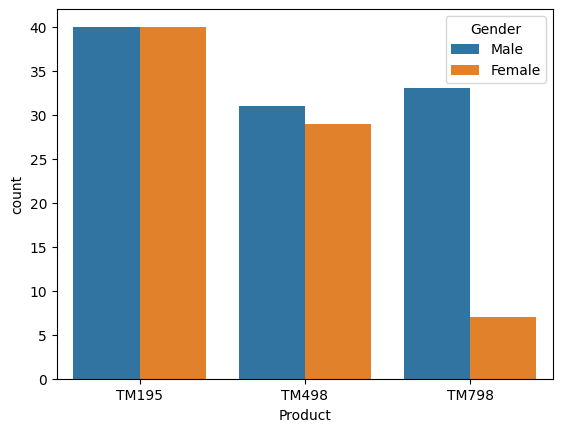

In [8]:
sns.countplot(x='Product',hue='Gender',data=df);

In [9]:
pd.pivot_table(df,index=['Product','Gender'],
              columns=['MaritalStatus'],aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [10]:
pd.pivot_table(df,'Income',index=['Product','Gender'],
              columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [12]:
# We see that the dataset contains int64 and object type data.
# The numberic features of the dataset are specific, but the objects can be broken down more.
def get_inferred_type(column):
    if pd.api.types.is_object_dtype(column):
        sample_value = column.dropna().iloc[0]
        return type(sample_value).__name__
    else:
        return column.dtype

def comparison_table(df):
    return pd.DataFrame({
        'Data Types':df.apply(get_inferred_type),
        'Missing Values':df.isna().sum(),
        'Unique Values':df.nunique()
    })

comp_table = comparison_table(df)
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(comp_table)

              Data Types  Missing Values  Unique Values
Product              str               0              3
Age                int64               0             32
Gender               str               0              2
Education          int64               0              8
MaritalStatus        str               0              2
Usage              int64               0              6
Fitness            int64               0              5
Income             int64               0             62
Miles              int64               0             37


In [13]:
# The above results gives us a bit more information. We see that there are 6 numeric features, and 3 string features.
# There are no missing values, and there are less that 100 unique values for each category.
# All categorical featues have a small number of unique values meaning that we could potentially use them as hues and get a good amount of information
len(df)

180

In [14]:
## What is the distribution of different variables in the data?
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


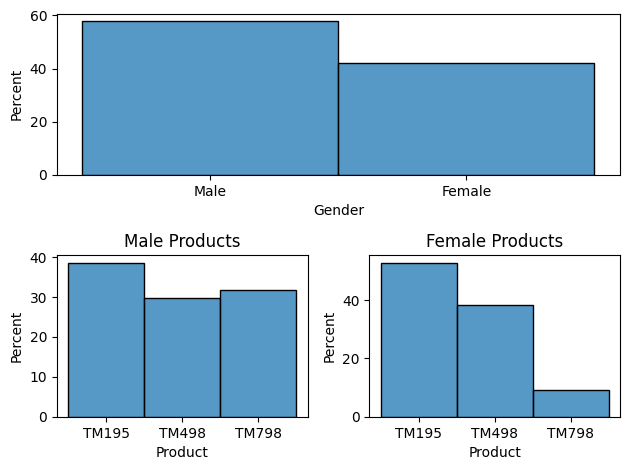

In [15]:
## Which product is more popular among males or females?
fig,axes = plt.subplot_mosaic("AA;BC") 
sns.histplot(df,x='Gender',stat='percent',ax=axes['A'])
sns.histplot(df[df['Gender'] == 'Female'],x='Product',stat='percent',ax=axes['C'])
axes['C'].set_title('Female Products')
sns.histplot(df[df['Gender'] == 'Male'],x='Product',stat='percent',ax=axes['B'])
axes['B'].set_title('Male Products')
plt.tight_layout()

* As we see from the above graphs, the data has a slightly higher distribution for male participants than female participants
* That being said, when we separate the data into the different gender groups that are provided, we see the following results
* Females tend to purchase the TM195 product at a much higher rate than the least popular product, TM798
* Furthermore close to 50% of females purchase the more popular model, TM195
* For the males, we see that the TM195 is ALSO the most popular product, with the least popular model (TM498) being at just below 30%

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


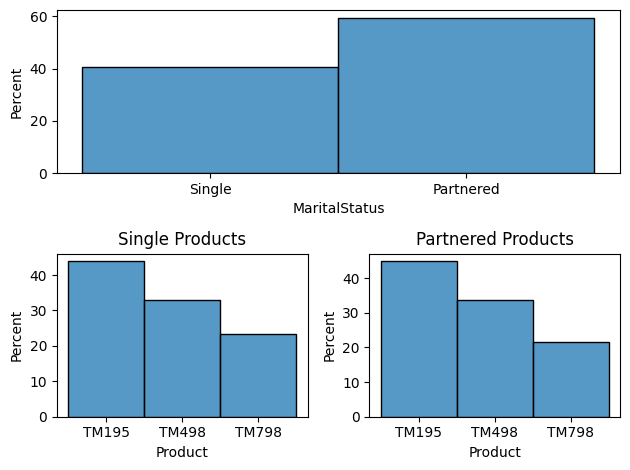

In [16]:
## Is the product purchase affected by the marital status of the customer?
fig,axes = plt.subplot_mosaic("AA;BC") 
sns.histplot(df,x='MaritalStatus',stat='percent',ax=axes['A'])
sns.histplot(df[df['MaritalStatus'] == 'Single'],x='Product',stat='percent',ax=axes['B'])
axes['B'].set_title('Single Products')
sns.histplot(df[df['MaritalStatus'] == 'Partnered'],x='Product',stat='percent',ax=axes['C'])
axes['C'].set_title('Partnered Products')
plt.tight_layout()

* When we look at the data for products and martial status like we did with gender, we see that the distribution doesn't change much
* Despite partnered data is over represented by about 20%, the likelihood that a customer would purchase a product tends to not change based on marital status.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

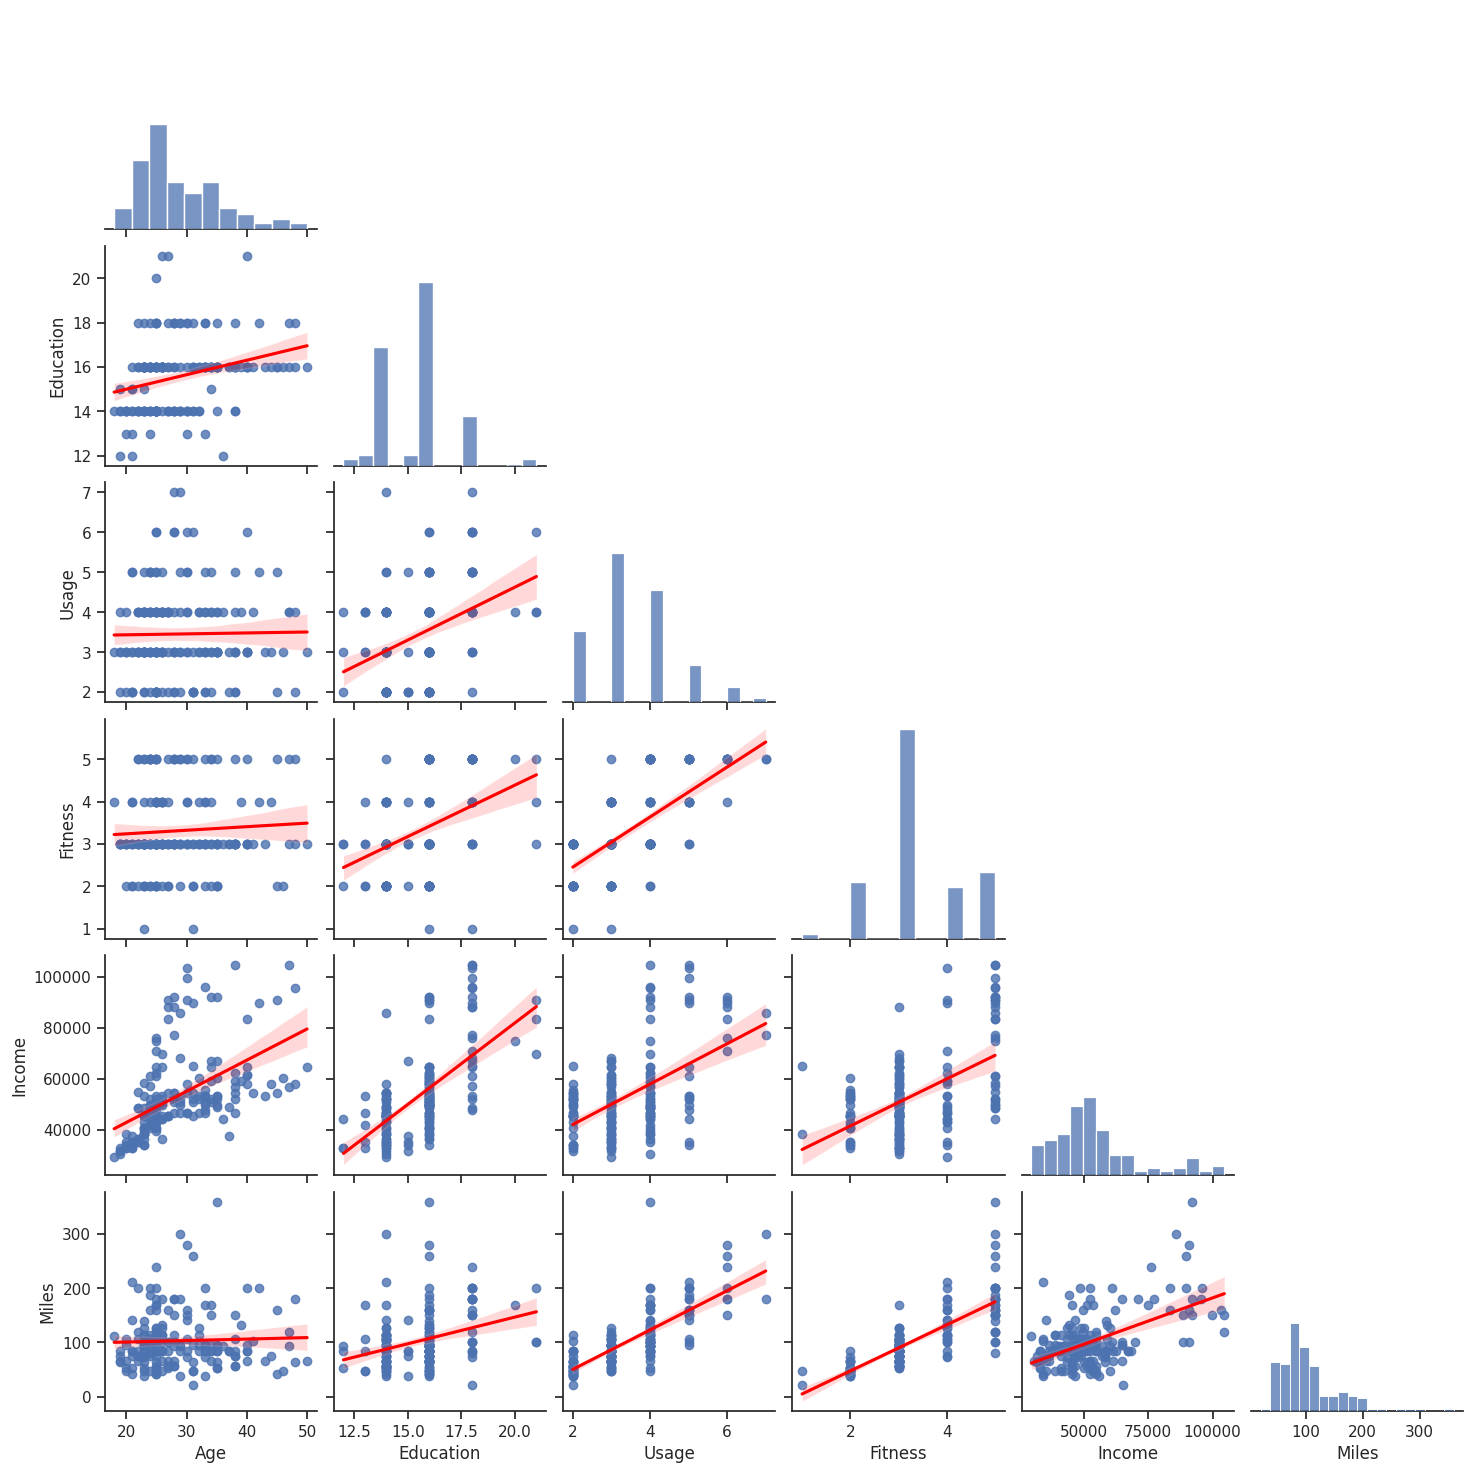

In [17]:
### Is there a significant correlation among some of the variables?
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,corner=True,kind='reg',plot_kws={'line_kws':{'color':'red'}})

* The graphs above shows there are a numbe of features that show good correlation
* From numerical features it appears that Income and Miles have a pretty positive correlation
* Age and Income also has a pretty strong positive correlation
* Most of the other Categorical features have noticeably positive correlation, but further analysis will have to be done before I would be inclined to say for certain whether there is correlation going on here.

<ipython-input-18-3cd339c99e47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


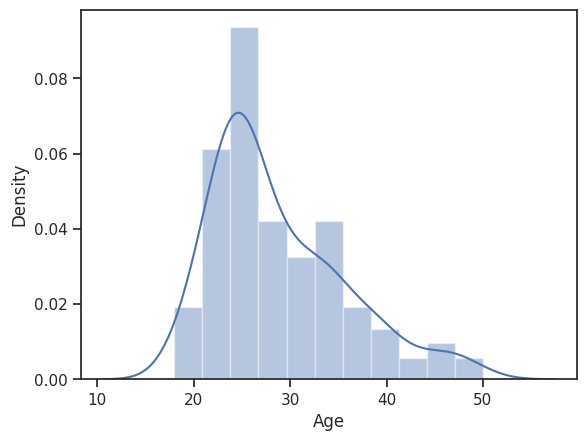

In [18]:
sns.distplot(df['Age']);

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

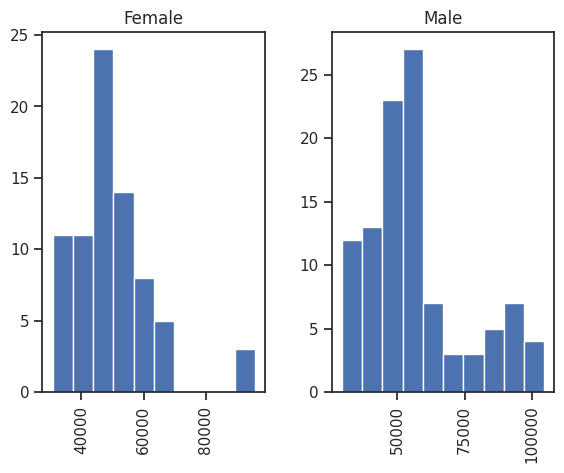

In [19]:
df.hist(by='Gender',column='Income')

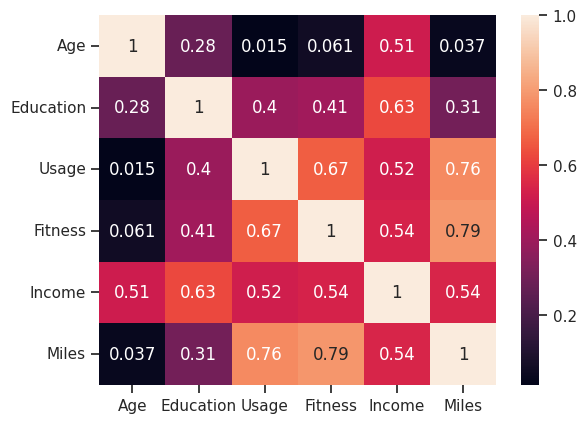

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

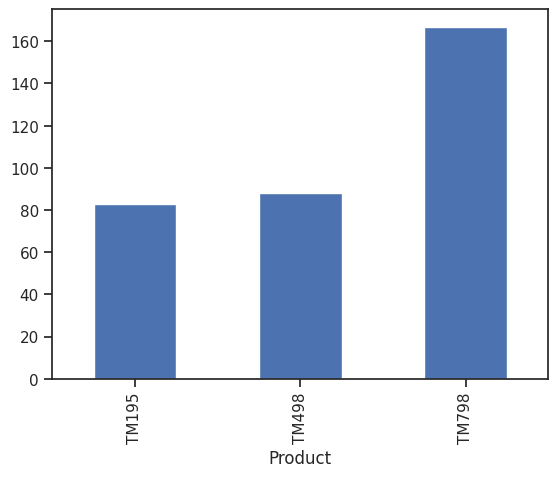

In [21]:
## What is the distribution of the average number of miles for each product?
average_per_product = df.groupby('Product')['Miles'].mean()
average_per_product.plot(kind='bar');

* Based on the data we were provided, it appears that the TM798 sees on average twice as much Miles as the other products

# Bonus
* Is there possiblity to make a predictive model out of the data?
* If so, I should do it